<a href="https://colab.research.google.com/github/cmd16/cs344/blob/master/hw04/hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.


### 2.

Hand-compute a single, complete back-propagation cycle. Use the example network from class and compute the updated weight values for the first gradient descent iteration for the XOR example, i.e., [1, 1] → 0. Use the same initial weights we used in the class example but assume the identity function as the activation function (f(x) = x).

#### Set up the network

In [0]:
import numpy as np

In [0]:
wi1h1 = 0.11
wi1h2 = 0.12
wi2h1 = 0.21
wi2h2 = 0.08

wh1o1 = 0.14
wh2o1 = 0.15

input2hidden = np.array([[wi1h1, wi1h2], [wi2h1, wi2h2]])
hidden2output = np.array([wh1o1, wh2o1])

In [21]:
input2hidden

array([[0.11, 0.12],
       [0.21, 0.08]])

In [22]:
hidden2output

array([0.14, 0.15])

#### Forward pass

In [0]:
inputs = np.array([1,1])
i0 = inputs[0]
i1 = inputs[1]

In [31]:
output = inputs @ input2hidden @ hidden2output
output

0.0748

#### Calculating Error

In [32]:
l2err = (0-output)**2
l2err

0.005595040000000001

In [33]:
delta = 0 - output
delta

-0.0748

#### Backpropagation

In [34]:
learning_rate = 0.05
hidden2outputnew = hidden2output + learning_rate * input2hidden[1] * 1.0 * delta
hidden2outputnew

array([0.1392146, 0.1497008])

In [35]:
learning_rate * np.array([[i0, i0], [i1, i1]]) * 1

array([[0.05, 0.05],
       [0.05, 0.05]])

In [36]:
input2hiddennew = input2hidden + learning_rate * np.array([[i0, i0], [i1, i1]]) * 1.0 * np.array([[wh1o1, wh2o1], [wh1o1, wh2o1]])
input2hiddennew

array([[0.117 , 0.1275],
       [0.217 , 0.0875]])

I don't understand where the identity function activation (as opposed to the RELU activation) is supposed to happen. But I did everything else according to the instructions (at least, I think I did).

### 3. Build a Keras-based ConvNet for Keras’s Fashion MNIST dataset (fashion_mnist). Experiment with different network architectures, submit your most performant network, and report the results.

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [0]:
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data()

In [23]:
# def decode_newswire(i):
#     return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])

print(
    f'training set \
        \n\tcount: {len(train_data)} \
        \n\tshape: {train_data.shape} \
        \n\timage data type: {train_data.dtype} \
        \n\tlabel data type: {train_targets.dtype} \
        \n\tlabel shape: {train_targets.shape} \n',
    f'testing set \
        \n\tcount: {len(test_targets)} \
        \n\tshape: {test_data.shape}\n',
    # f'example \
    #     \n\tarticle values: {test_data[0]} \
    #     \n\tarticle words: {decode_newswire(0)} \
    #     \n\tarticle topic: {test_labels[0]}'
)

training set         
	count: 60000         
	shape: (60000, 28, 28)         
	image data type: uint8         
	label data type: uint8         
	label shape: (60000,) 
 testing set         
	count: 10000         
	shape: (10000, 28, 28)



60000 training samples and 10000 test samples, all of type `uint8`. `uint8` data type contains all whole numbers from 0 to 255. This data type is mostly used in graphics. [uint8 Data Type](https://www.cs.utah.edu/~germain/PPS/Topics/Matlab/uint8.html)

But first, let's try to see what we are looking at. I found the following chunk of code from this tutorial https://www.tensorflow.org/tutorials/keras/classification, but I looked only at this part: how to generate an image from the data.

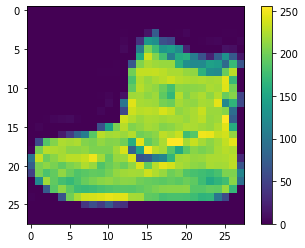

In [15]:
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

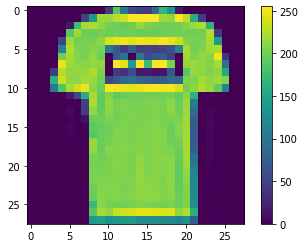

In [16]:
plt.figure()
plt.imshow(train_data[1])
plt.colorbar()
plt.grid(False)
plt.show()

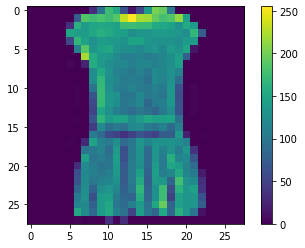

In [17]:
plt.figure()
plt.imshow(train_data[3])
plt.colorbar()
plt.grid(False)
plt.show()

That's enough to get an idea. It seems different images show different types of clothing articles. It looks like we have a shoe, a shirt, and a dress.

In [19]:
train_targets[0]

9

In [24]:
train_targets[1]

0

In [25]:
train_targets[2]

0

Ok, so each image has a numerical label, and it seems the shirt and the dress have the same label (which is a different label from the shoe).

If I were doing this not for homework, I might do some more looking into the data (like looking up information on the dataset). But since this is a homework assignment I'm not sure how much I can do before it becomes just finding and following someone else's approach. At any rate, I think I have enough information to try to train a model.

In our example of mnist in class, we did a reshape step. I thought we didn't need the step because the shape is already the shape we want. But I suppose I was wrong since when I left the reshape step out I couldn't fit the model. We also need to change the data type so we can get it to work in our model.

In [0]:
train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32') / 255

train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

In [43]:
train_targets[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Looks like this is a one-hot vector that encodes the category. That would make sense from this output and that seems to be what the keras documentation says (https://keras.io/utils/). This first image is category 0, and there are 10 categories. To provide support for this theory, I'll see what happens with the other two training images I looked at. I expect images 1 and 2 to have the same category (which should be different from the category of image 0).

In [31]:
train_targets[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
train_targets[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Ok, I guess that wasn't accurate, since all three images have the same vector for their categories. I think that the categories are encoded with one-hot vectors, but that the vectors don't necessarily match the original shape/type of `train_targets` in a way that I can understand.

Delving into the exact ways the categories are encoded is probably not the focus of this exercise, and we had a very similar example working in class, so I'm going to set that aside for now and proceed with training.

#### First model: in class example
Following the example from class exactly.

In [44]:
mod0 = models.Sequential()
mod0.name="344class-sequential-0"

# Configure a convnet with 3 layers of convolutions and max pooling.
mod0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
mod0.add(layers.MaxPooling2D((2, 2)))
mod0.add(layers.Conv2D(64, (3, 3), activation='relu'))
mod0.add(layers.MaxPooling2D((2, 2)))
mod0.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add layers to flatten the 2D image and then do a 10-way classification.
mod0.add(layers.Flatten())
mod0.add(layers.Dense(64, activation='relu'))
mod0.add(layers.Dense(10, activation='softmax'))

mod0.summary()


Model: "344class-sequential-0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)      

I'm following the example from https://keras.io/visualization/ so I can plot validation accuracy.

In [46]:
mod0.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist0 = mod0.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=64)
# mod0.evaluate(test_data, test_targets)

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 39s 856us/step - loss: 0.2074 - accuracy: 0.9233 - val_loss: 0.2372 - val_accuracy: 0.9108
Epoch 2/5
45000/45000 [==============================] - 38s 854us/step - loss: 0.1887 - accuracy: 0.9316 - val_loss: 0.2129 - val_accuracy: 0.9229
Epoch 3/5
45000/45000 [==============================] - 39s 862us/step - loss: 0.1725 - accuracy: 0.9363 - val_loss: 0.2459 - val_accuracy: 0.9095
Epoch 4/5
45000/45000 [==============================] - 39s 866us/step - loss: 0.1599 - accuracy: 0.9407 - val_loss: 0.2444 - val_accuracy: 0.9131
Epoch 5/5
45000/45000 [==============================] - 43s 958us/step - loss: 0.1465 - accuracy: 0.9460 - val_loss: 0.2370 - val_accuracy: 0.9161


In [0]:
def plot_acc(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def plot_loss(history):
  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

def plot_metrics(history):
  plot_acc(history)
  plot_loss(history)

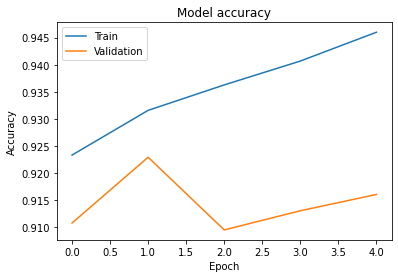

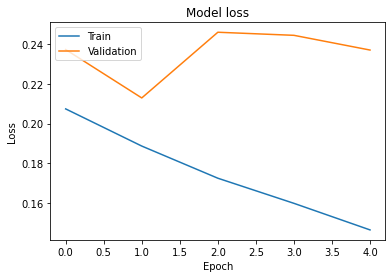

In [58]:
plot_metrics(hist0)

##### First model: tuning hyperparameters


Training is getting really accurate, validation less so. I don't like the loss  validation curve. Why did we suddenly jump up after epoch 1? Perhaps the model is learning too quickly. I'm going to try decreasing the learning rate (and then I might increase the batch size). Default is 0.001, so I'll go to 0.0001.

In [0]:
from keras import optimizers

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 39s 877us/step - loss: 0.0960 - accuracy: 0.9660 - val_loss: 0.2024 - val_accuracy: 0.9302
Epoch 2/5
45000/45000 [==============================] - 39s 867us/step - loss: 0.0858 - accuracy: 0.9699 - val_loss: 0.2069 - val_accuracy: 0.9326
Epoch 3/5
45000/45000 [==============================] - 39s 866us/step - loss: 0.0812 - accuracy: 0.9716 - val_loss: 0.2091 - val_accuracy: 0.9319
Epoch 4/5
45000/45000 [==============================] - 39s 877us/step - loss: 0.0772 - accuracy: 0.9732 - val_loss: 0.2159 - val_accuracy: 0.9323
Epoch 5/5
45000/45000 [==============================] - 39s 872us/step - loss: 0.0741 - accuracy: 0.9742 - val_loss: 0.2146 - val_accuracy: 0.9311


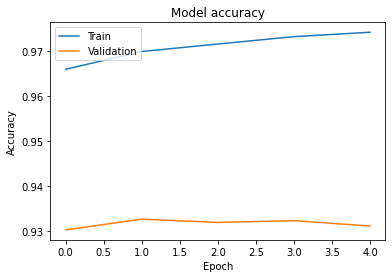

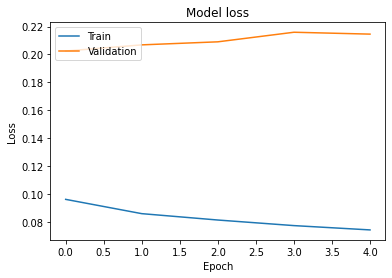

In [60]:
mod0.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
hist0 = mod0.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=64)
plot_metrics(hist0)

Ok, that was the wrong direction (or too far). This model isn't learning much. I'll try increasing the batch size, and then if I get nowhere with that I'll try another model.

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 35s 787us/step - loss: 0.0694 - accuracy: 0.9769 - val_loss: 0.2136 - val_accuracy: 0.9331
Epoch 2/5
45000/45000 [==============================] - 35s 783us/step - loss: 0.0670 - accuracy: 0.9774 - val_loss: 0.2159 - val_accuracy: 0.9321
Epoch 3/5
45000/45000 [==============================] - 35s 785us/step - loss: 0.0649 - accuracy: 0.9784 - val_loss: 0.2147 - val_accuracy: 0.9321
Epoch 4/5
45000/45000 [==============================] - 35s 783us/step - loss: 0.0630 - accuracy: 0.9791 - val_loss: 0.2199 - val_accuracy: 0.9317
Epoch 5/5
45000/45000 [==============================] - 35s 787us/step - loss: 0.0614 - accuracy: 0.9800 - val_loss: 0.2201 - val_accuracy: 0.9317


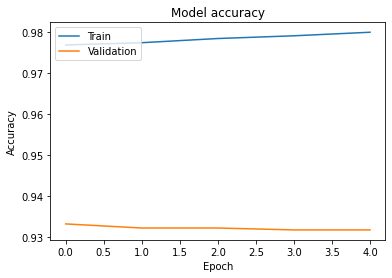

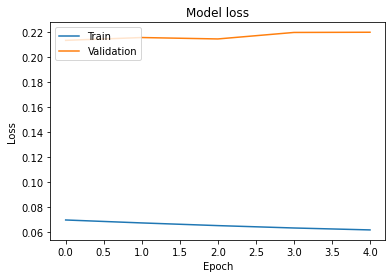

In [61]:
mod0.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
hist0 = mod0.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=200)
plot_metrics(hist0)

That didn't help. I'll get the test accuracy of my best version and move on to the next approach.

#### First model: report of best version
I found this to be my best-performing version overall.

In [62]:
mod0.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist0 = mod0.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=64)
mod0.evaluate(test_data, test_targets)

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 40s 900us/step - loss: 0.1209 - accuracy: 0.9547 - val_loss: 0.2529 - val_accuracy: 0.9209
Epoch 2/5
45000/45000 [==============================] - 41s 907us/step - loss: 0.1133 - accuracy: 0.9581 - val_loss: 0.3715 - val_accuracy: 0.9023
Epoch 3/5
45000/45000 [==============================] - 41s 907us/step - loss: 0.1056 - accuracy: 0.9602 - val_loss: 0.3019 - val_accuracy: 0.9164
Epoch 4/5
45000/45000 [==============================] - 41s 903us/step - loss: 0.0994 - accuracy: 0.9634 - val_loss: 0.3441 - val_accuracy: 0.9132
Epoch 5/5
10000/10000 [==============================] - 3s 263us/step


[0.33252576345801355, 0.9053000211715698]

- Training loss: 0.1465
- Training accuracy: 0.9460 
- Validation loss: 0.2370 
- Validation accuracy: 0.9161
- Test loss: 0.3325
- Test accuracy: 0.9053

### Second model: following the tensorflow.keras example for classifying cats and dogs

I'm going to try to recreate the tensorflow.keras example we did in lab for classifying cats and dogs (except as multiclass not binary class).

In [0]:
model = models.Sequential()
model.name="img_input-1"

# I can't figure out how to add this step!
# Our input feature map is 28x28x3: 28x28 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(28, 28, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(layers.Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(layers.Dense(512, activation='relu'))

# 10-way classification
model.add(layers.Dense(10, activation='softmax'))

In [69]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=64)
# model.evaluate(test_data, test_targets)

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 24s 538us/step - loss: 0.7146 - accuracy: 0.7346 - val_loss: 0.6383 - val_accuracy: 0.7696
Epoch 2/5
45000/45000 [==============================] - 23s 520us/step - loss: 0.4744 - accuracy: 0.8256 - val_loss: 0.4631 - val_accuracy: 0.8259
Epoch 3/5
45000/45000 [==============================] - 23s 518us/step - loss: 0.4082 - accuracy: 0.8491 - val_loss: 0.4368 - val_accuracy: 0.8427
Epoch 4/5
45000/45000 [==============================] - 24s 523us/step - loss: 0.3658 - accuracy: 0.8645 - val_loss: 0.4164 - val_accuracy: 0.8459
Epoch 5/5
45000/45000 [==============================] - 24s 532us/step - loss: 0.3360 - accuracy: 0.8756 - val_loss: 0.3721 - val_accuracy: 0.8622


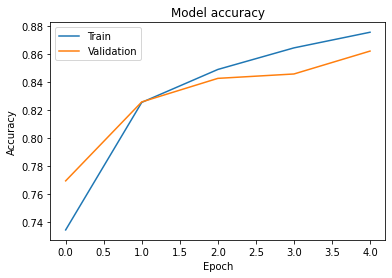

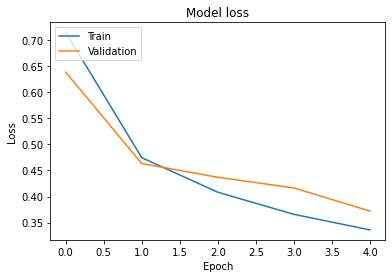

In [70]:
plot_metrics(hist)

Lower accuracy and higher loss. It looks like this model is still learning, though the curve has flattened a bit. I'm going to try a larger batch size.

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 20s 446us/step - loss: 0.2959 - accuracy: 0.8886 - val_loss: 0.3310 - val_accuracy: 0.8787
Epoch 2/5
45000/45000 [==============================] - 20s 443us/step - loss: 0.2795 - accuracy: 0.8966 - val_loss: 0.3190 - val_accuracy: 0.8839
Epoch 3/5
45000/45000 [==============================] - 20s 444us/step - loss: 0.2700 - accuracy: 0.9001 - val_loss: 0.3347 - val_accuracy: 0.8780
Epoch 4/5
45000/45000 [==============================] - 20s 444us/step - loss: 0.2584 - accuracy: 0.9025 - val_loss: 0.3185 - val_accuracy: 0.8833
Epoch 5/5
45000/45000 [==============================] - 20s 444us/step - loss: 0.2499 - accuracy: 0.9049 - val_loss: 0.3375 - val_accuracy: 0.8781


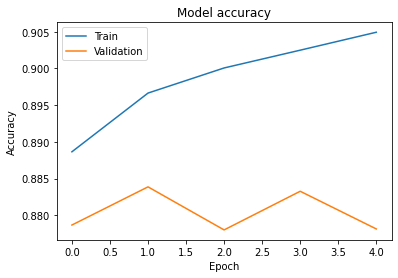

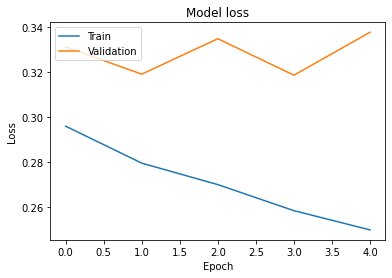

In [72]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_targets, validation_split=0.25, epochs=5, batch_size=200)
plot_metrics(hist)

In [73]:
model.evaluate(test_data, test_targets)

10000/10000 [==============================] - 2s 189us/step


[0.34428256900310517, 0.8770999908447266]

If I could figure out how to add the image input step, this model would probably do better (the model was probably designed with the assumption that we can use the image input step). But I don't know how to do that step. That means that my best model is the first model that is just like what we did in class.